# Primer práctica de machine learning aplicado a materiales
El objetivo de esta notebook es utilizar la herramienta de matminer para el minado de datos de materiales así como prácticar con la base de datos del artículo principal del cual me estoy basando.


## I) Recuperación y filtrado de datos.

In [14]:
#Extraemos la base de datos del artículo en la parte de indormación suplementaria
from tabula import read_pdf #Paqueteria para extraer los datos 
#Listas donde se guardan la base de datos
df1 = read_pdf("datos1_ref.pdf",pages='all') 
df2 = read_pdf("datos2_ref.pdf",pages='all')
df3 = read_pdf("datos3_ref.pdf",pages="all") 

In [15]:
import numpy as np 
#Leemos las listas en formato arreglo numpy
data1 = np.loadtxt("df1.txt", skiprows=1, dtype='str') 
data2 = np.loadtxt("df2.txt", skiprows=1, dtype='str')
data3 = np.loadtxt("df3.txt", skiprows=1, dtype='str')
data4 = np.loadtxt("df4.txt", skiprows=1, dtype='str')
data5 = np.loadtxt("df5.txt", skiprows=1, dtype='str')
data6 = np.loadtxt("df6.txt", skiprows=1, dtype='str')

In [16]:
import pandas as pd
#Creamos los dataframe de la base de datos que está dividida en tres areglos
df1 = pd.DataFrame(data1, columns=['index', 'number', 'mxene', 'Egw', 'nan1','Epbe', 'nan2', 'phiL' ])
df2 = pd.DataFrame(data2, columns=['index', 'phiU', 'd', 'deltaD', 'V', 'APF'])
df3 = pd.DataFrame(data3, columns=['index', 'number', 'mxene', 'Ev', 'Ec', 'phiN','a','c','Hf'])
df4 = pd.DataFrame(data4, columns=['index', 'number', 'mxene', 'Egw', 'Epbe', 'phiL','phiU','d','deltaD'])
df5 = pd.DataFrame(data5, columns=['index', 'V', 'APF'])
df6 = pd.DataFrame(data6, columns=['index', 'number', 'mxene', 'Ev', 'Ec', 'phiN','a','c','Hf'])

In [17]:
#Quitamos las columnas que no nos interesan
df1 = df1.drop(['index','nan1','Epbe','nan2'], axis=1)
df2 = df2.drop(['index'], axis=1)
df3 = df3.drop(['index','number','mxene'],axis=1)
df4 = df4.drop(['index','Epbe'],axis=1)
df5 = df5.drop(['index'],axis=1)
df6 = df6.drop(['index','number','mxene'],axis=1)

In [18]:
#Concatenamos los dataframes por columnas para tener la base de datos completa
df7=pd.concat([df1,df2,df3], axis=1) 
df8=pd.concat([df4,df5,df6], axis=1) 
df=pd.concat([df7,df8],ignore_index=True) 

In [19]:
df.dtypes

number    object
mxene     object
Egw       object
phiL      object
phiU      object
d         object
deltaD    object
V         object
APF       object
Ev        object
Ec        object
phiN      object
a         object
c         object
Hf        object
dtype: object

In [20]:
df=df.drop(['number','mxene'],axis=1) #Quitando columnas no necesarias

In [21]:
df=df.astype('float64') #Convirtiendo a números reales

In [22]:
df.dtypes

Egw       float64
phiL      float64
phiU      float64
d         float64
deltaD    float64
V         float64
APF       float64
Ev        float64
Ec        float64
phiN      float64
a         float64
c         float64
Hf        float64
dtype: object

In [23]:
df

,Egw,phiL,phiU,d,deltaD,V,APF,Ev,Ec,phiN,a,c,Hf
0,3.3956,2.1713,6.3336,2.4302,-0.0512,39.0152,0.3661,-5.6868,-4.8112,4.2524,3.5492,1.0,-11.2764
1,3.3659,2.1340,6.3941,2.4424,-0.0634,39.7189,0.3667,-5.4308,-4.6039,4.2641,3.5791,1.0,-10.6495
2,3.3072,3.3325,4.5681,2.4290,-0.0500,39.0158,0.3661,-4.0290,-3.1041,3.9504,3.5509,1.0,-12.6013
3,3.2661,2.9483,3.2084,2.4139,-0.0349,38.2206,0.3786,-3.2805,-2.3552,3.0783,3.5155,1.0,-9.9570
4,3.2553,3.0055,4.3419,2.4407,-0.0617,39.6260,0.3724,-3.1205,-2.3024,3.6737,3.5785,1.0,-10.5544
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1.8565,0.6179,3.7123,2.3915,-0.0125,42.9717,0.3179,-2.4807,-1.5386,2.1651,3.4510,1.0,-13.2859
66,1.8312,0.4785,4.6437,2.4349,-0.0559,45.8995,0.3113,-2.5465,-1.7149,2.5612,3.5643,1.0,-10.5032
67,1.7317,0.4122,4.7798,2.4223,-0.0434,54.0109,0.3113,-2.7664,-1.8683,2.5960,3.5318,1.0,-11.0999
68,1.6075,-0.7587,4.1474,2.3315,0.2134,50.3116,0.2734,-3.1444,-2.4081,1.6943,3.4202,1.0,-10.6379


## II)  Análisis exploratorio

<Axes: >

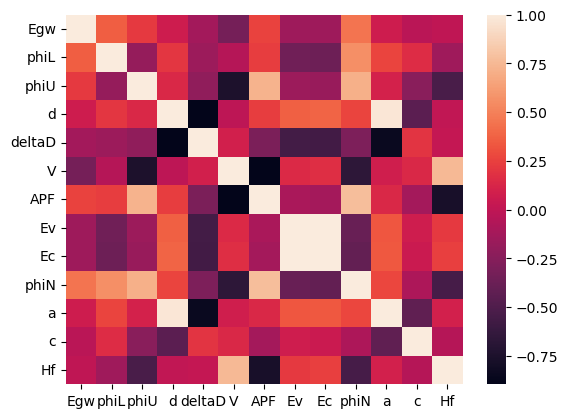

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
cor = df.corr()
sns.heatmap(cor)

In [25]:
df.describe()

,Egw,phiL,phiU,d,deltaD,V,APF,Ev,Ec,phiN,a,c,Hf
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2.433434,2.018747,4.599370,2.406267,0.032930,46.829944,0.333794,-5.103444,-4.166974,3.309461,3.517453,0.957143,-10.691054
std,0.377458,1.215041,1.419435,0.066481,0.129483,10.971596,0.080267,1.753384,1.736918,0.843567,0.102522,0.203997,2.929103
min,1.586700,-1.097800,1.554600,2.280600,-0.110800,29.685600,0.222200,-9.764900,-9.062500,1.554400,3.293700,0.000000,-17.594900
25%,2.283050,1.401725,3.277975,2.341200,-0.055275,38.419250,0.269525,-5.890425,-4.959825,2.624700,3.447125,1.000000,-12.656275
50%,2.401250,2.015250,4.572950,2.422300,-0.041550,44.849550,0.313900,-5.256200,-4.271900,3.233950,3.530950,1.000000,-10.643700
75%,2.571175,3.073600,5.666350,2.440075,0.203625,56.230075,0.376400,-3.802400,-2.939150,4.135375,3.575400,1.000000,-8.430825
max,3.395600,4.603300,8.333400,2.570600,0.264300,69.386600,0.537100,-2.059800,-1.259300,4.930200,3.774800,1.000000,-6.311800


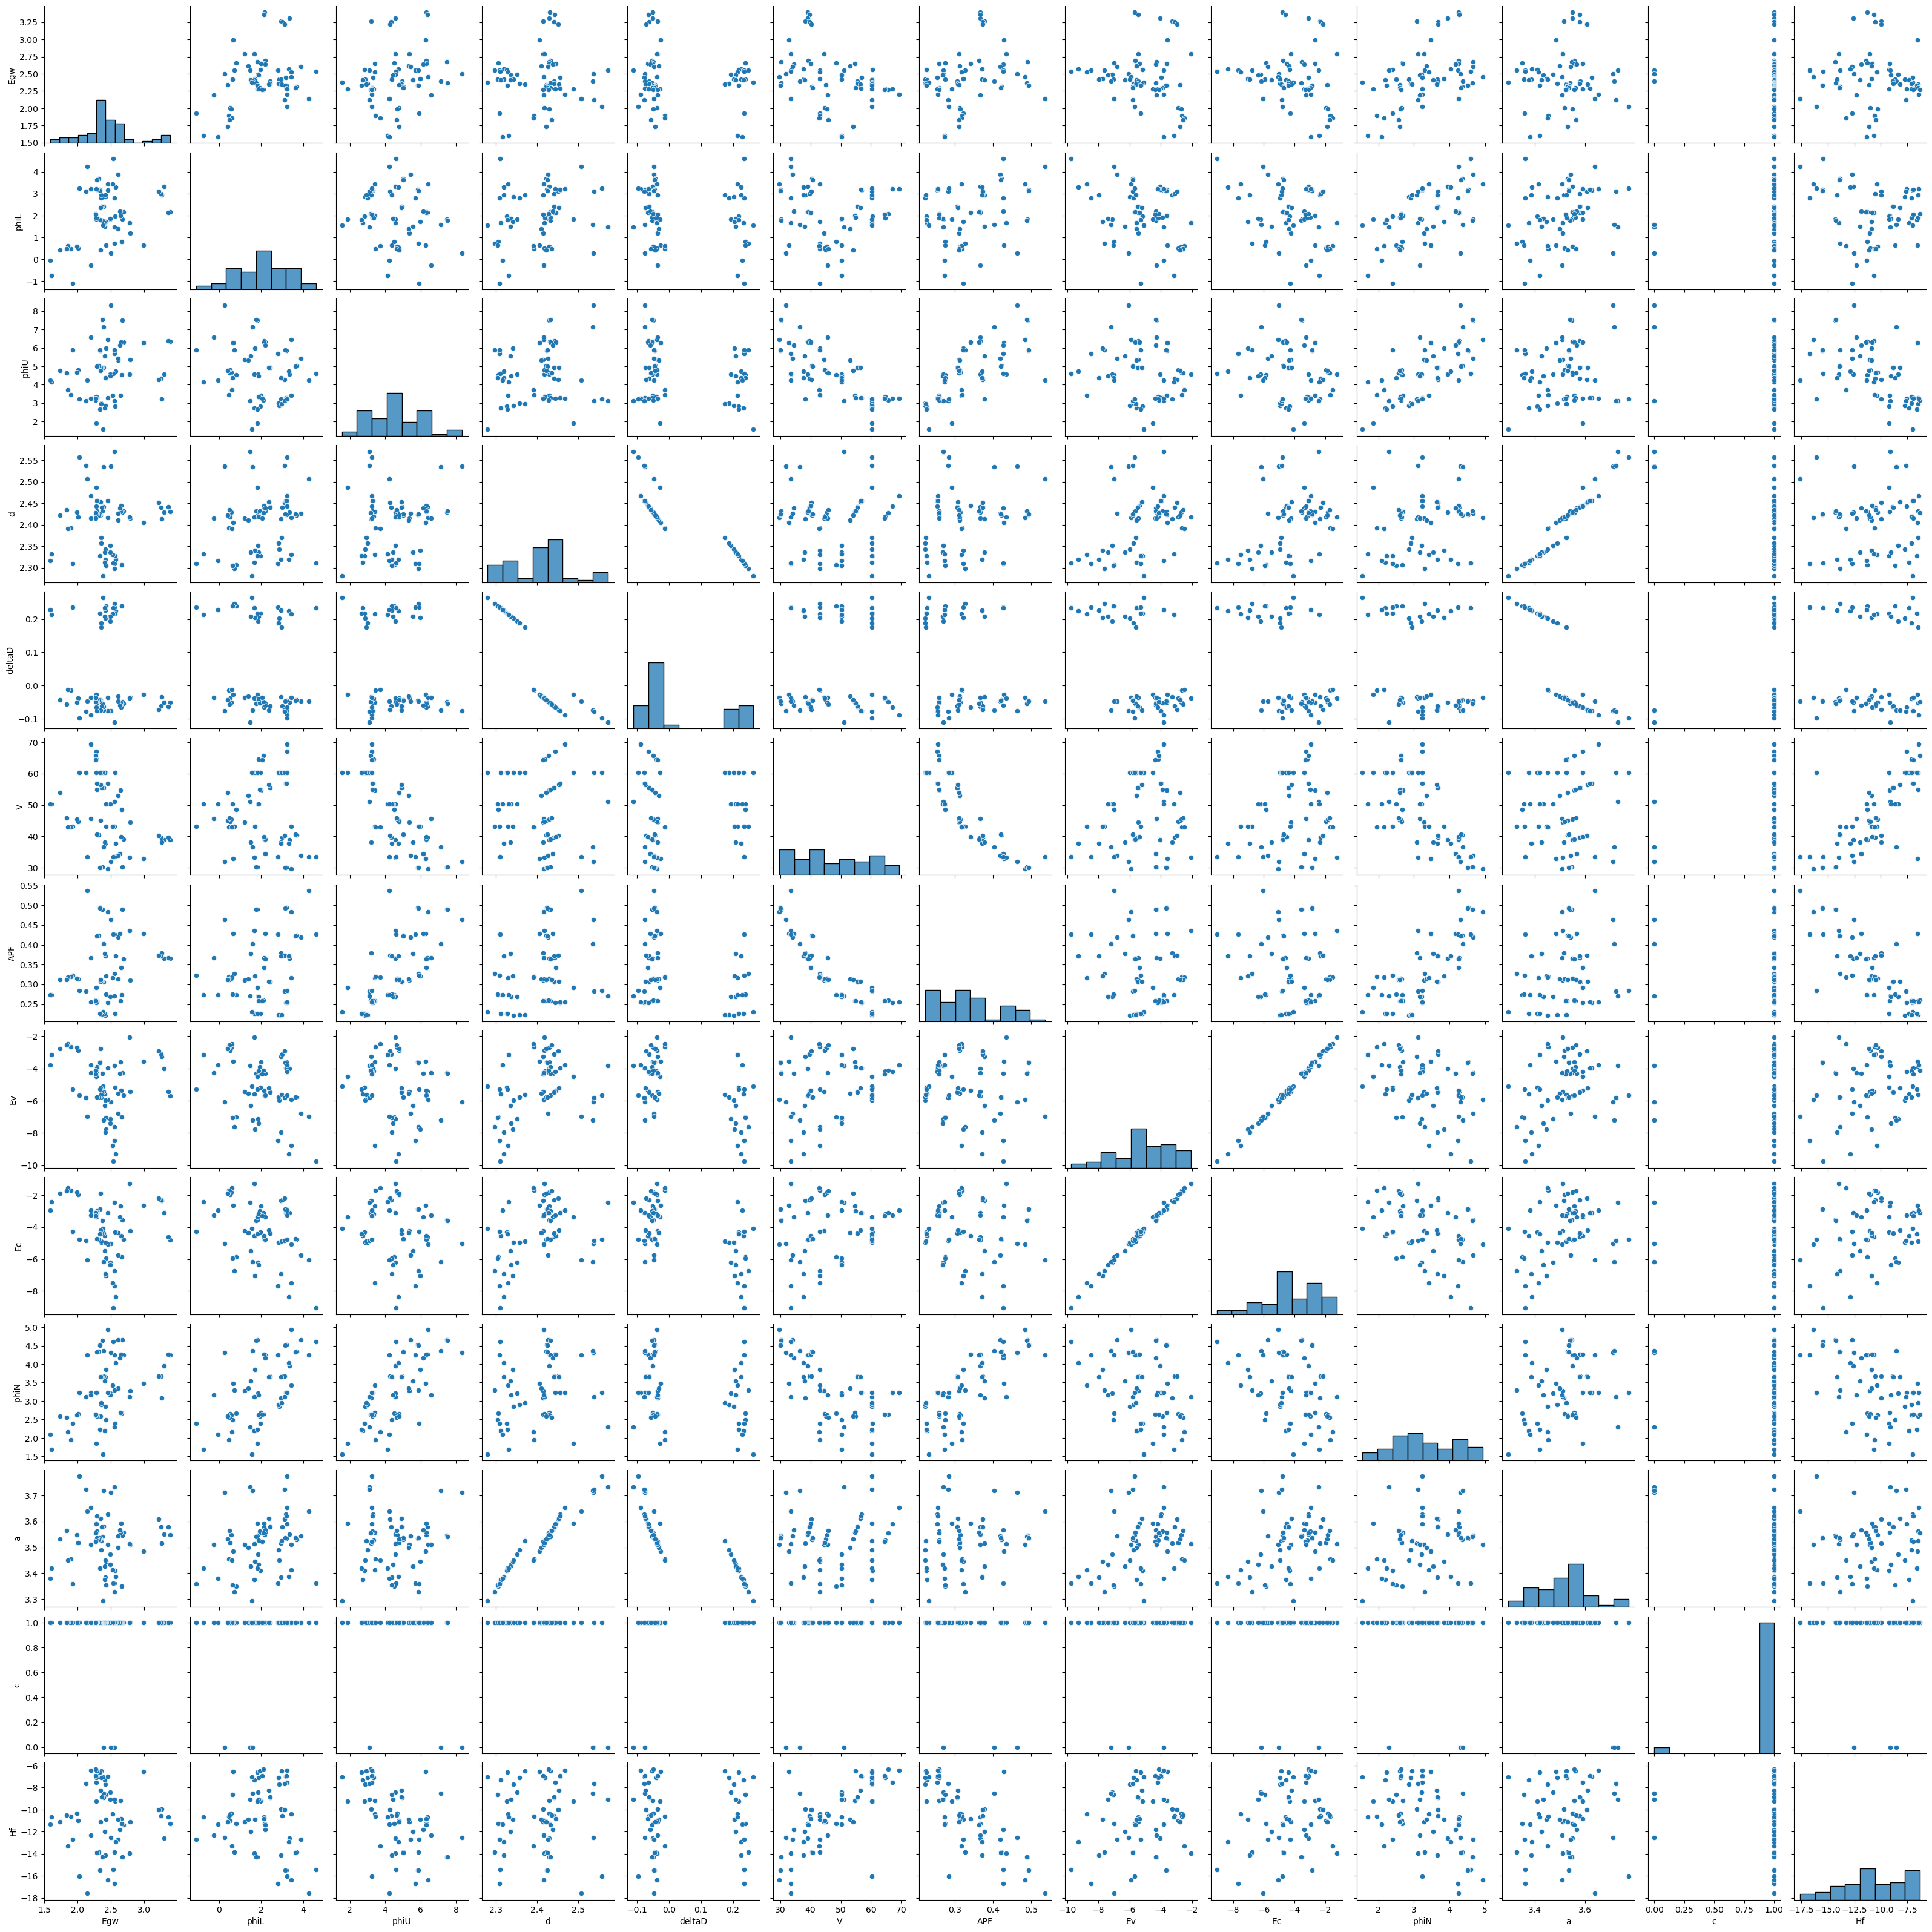

In [26]:
sns.pairplot(df)
plt.show()

In [27]:
df

,Egw,phiL,phiU,d,deltaD,V,APF,Ev,Ec,phiN,a,c,Hf
0,3.3956,2.1713,6.3336,2.4302,-0.0512,39.0152,0.3661,-5.6868,-4.8112,4.2524,3.5492,1.0,-11.2764
1,3.3659,2.1340,6.3941,2.4424,-0.0634,39.7189,0.3667,-5.4308,-4.6039,4.2641,3.5791,1.0,-10.6495
2,3.3072,3.3325,4.5681,2.4290,-0.0500,39.0158,0.3661,-4.0290,-3.1041,3.9504,3.5509,1.0,-12.6013
3,3.2661,2.9483,3.2084,2.4139,-0.0349,38.2206,0.3786,-3.2805,-2.3552,3.0783,3.5155,1.0,-9.9570
4,3.2553,3.0055,4.3419,2.4407,-0.0617,39.6260,0.3724,-3.1205,-2.3024,3.6737,3.5785,1.0,-10.5544
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1.8565,0.6179,3.7123,2.3915,-0.0125,42.9717,0.3179,-2.4807,-1.5386,2.1651,3.4510,1.0,-13.2859
66,1.8312,0.4785,4.6437,2.4349,-0.0559,45.8995,0.3113,-2.5465,-1.7149,2.5612,3.5643,1.0,-10.5032
67,1.7317,0.4122,4.7798,2.4223,-0.0434,54.0109,0.3113,-2.7664,-1.8683,2.5960,3.5318,1.0,-11.0999
68,1.6075,-0.7587,4.1474,2.3315,0.2134,50.3116,0.2734,-3.1444,-2.4081,1.6943,3.4202,1.0,-10.6379


## III) Definiendo la variable objetivo y las caracteríticas

In [28]:
x=df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]]
y=df.iloc[:,[0]]

In [29]:
x.head()

,phiL,phiU,d,deltaD,V,APF,Ev,Ec,phiN,a,c,Hf
0,2.1713,6.3336,2.4302,-0.0512,39.0152,0.3661,-5.6868,-4.8112,4.2524,3.5492,1.0,-11.2764
1,2.1340,6.3941,2.4424,-0.0634,39.7189,0.3667,-5.4308,-4.6039,4.2641,3.5791,1.0,-10.6495
2,3.3325,4.5681,2.4290,-0.0500,39.0158,0.3661,-4.0290,-3.1041,3.9504,3.5509,1.0,-12.6013
3,2.9483,3.2084,2.4139,-0.0349,38.2206,0.3786,-3.2805,-2.3552,3.0783,3.5155,1.0,-9.9570
4,3.0055,4.3419,2.4407,-0.0617,39.6260,0.3724,-3.1205,-2.3024,3.6737,3.5785,1.0,-10.5544


<Axes: >

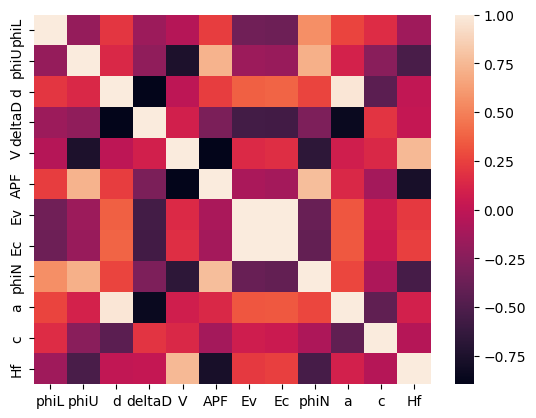

In [30]:
cor = x.corr()
sns.heatmap(cor)

In [31]:
y.head()

,Egw
0,3.3956
1,3.3659
2,3.3072
3,3.2661
4,3.2553


## IV) Creación del modelo

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')


In [33]:
#Creamos el modelo
regressor = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)

In [34]:
# Train test split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

In [35]:
#Entrenamos el modelo
regressor.fit(x_train, y_train)

RandomForestRegressor(oob_score=True, random_state=0)

In [36]:
#Accediendo al puntaje OOB
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.48769620157014104


In [37]:
predictions = regressor.predict(x_test)

In [38]:
predictions

array([2.672009, 2.519213, 2.149582, 2.298104, 2.658847, 2.382467,
       2.396855, 2.430015, 2.399089, 2.367557, 2.59086 ])

In [39]:
x_test

,phiL,phiU,d,deltaD,V,APF,Ev,Ec,phiN,a,c,Hf
65,0.6179,3.7123,2.3915,-0.0125,42.9717,0.3179,-2.4807,-1.5386,2.1651,3.4510,1.0,-13.2859
26,1.8632,4.4578,2.3365,0.2084,50.3116,0.2690,-7.4028,-6.3604,3.1605,3.4332,1.0,-9.0535
66,0.4785,4.6437,2.4349,-0.0559,45.8995,0.3113,-2.5465,-1.7149,2.5612,3.5643,1.0,-10.5032
54,2.0916,3.1686,2.4273,-0.0483,65.7179,0.2593,-4.1314,-3.1110,2.6301,3.5563,1.0,-6.3118
27,3.4256,6.4349,2.4158,-0.0368,29.6856,0.4837,-5.9212,-5.0700,4.9302,3.5099,1.0,-16.3490
60,3.2331,3.2331,2.5568,-0.0970,60.3739,0.2839,-5.6758,-4.7815,3.2331,3.7748,1.0,-16.0562
49,3.6393,5.0062,2.4244,-0.0455,40.6216,0.4215,-5.7805,-4.7235,4.3228,3.5367,1.0,-13.8827
36,2.4162,4.9424,2.4416,-0.0626,55.5433,0.3066,-5.4428,-4.3948,3.6793,3.5815,1.0,-8.8926
48,1.9165,3.2721,2.4316,-0.0526,54.9916,0.2582,-3.9051,-2.9789,2.5943,3.5630,1.0,-6.4954
31,2.8531,2.8531,2.3424,0.2025,60.3739,0.2222,-5.9733,-4.9618,2.8523,3.4502,1.0,-7.7255


In [40]:
y_test

,Egw
65,1.8565
26,2.4866
66,1.8312
54,2.2760
27,2.4567
60,2.0275
49,2.2938
36,2.3920
48,2.2946
31,2.4206


In [41]:
# Evaluando el modelo (métricas de comparación)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 0.1339799256461819
R-squared: 0.06576405573112609


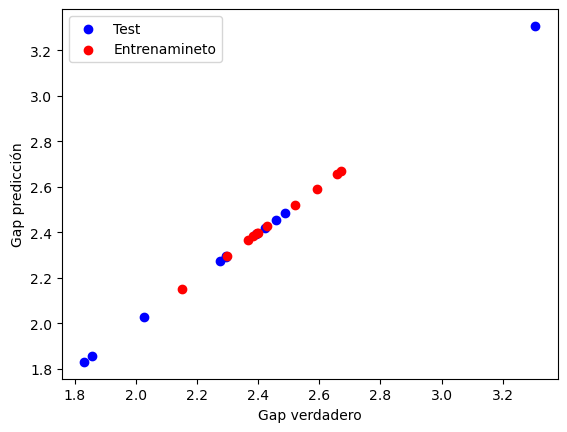

In [42]:
plt.scatter(y_test,y_test, color='blue',label='Test')
plt.scatter(predictions,predictions,color='red',label='Predicción')
plt.ylabel('Gap predicción')
plt.xlabel('Gap verdadero')
plt.legend()